In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [35]:
# Load the CSV file
df = pd.read_csv('quotes.csv')

In [7]:
print(df.columns)

Index(['Author', 'Quote', 'Tags'], dtype='object')


In [37]:
# Basic EDA

In [39]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
            Author                                              Quote  \
0  Albert Einstein  “The world as we have created it is a process ...   
1     J.K. Rowling  “It is our choices, Harry, that show what we t...   
2  Albert Einstein  “There are only two ways to live your life. On...   
3      Jane Austen  “The person, be it gentleman or lady, who has ...   
4   Marilyn Monroe  “Imperfection is beauty, madness is genius and...   

                                       Tags  
0       change,deep-thoughts,thinking,world  
1                         abilities,choices  
2  inspirational,life,live,miracle,miracles  
3             aliteracy,books,classic,humor  
4                 be-yourself,inspirational  


In [41]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  100 non-null    object
 1   Quote   100 non-null    object
 2   Tags    97 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB
None


In [43]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Author    0
Quote     0
Tags      3
dtype: int64


In [47]:
print("\nUnique authors:")
print(df['Author'].nunique())


Unique authors:
50


In [49]:
print("\nNumber of unique tags (if tags exist):")
if 'tags' in df.columns:
    print(df['tags'].explode().nunique())  # If tags are stored as lists


Number of unique tags (if tags exist):


In [ ]:
# Bar chart: Top 10 most quoted authors

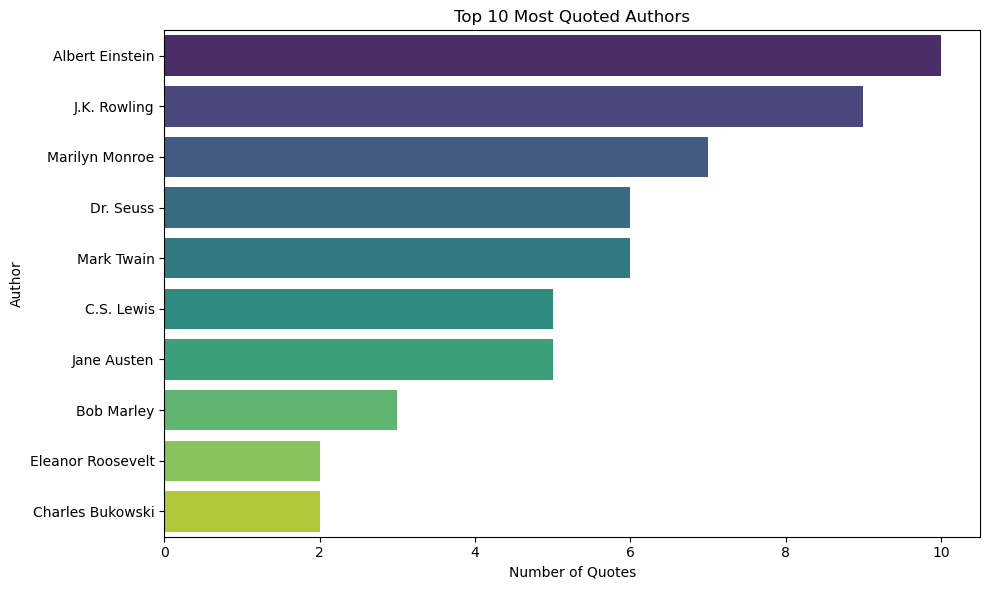

In [55]:
# Get top 10 most quoted authors
top_authors = df['Author'].value_counts().head(10)
# Set the figure size for the plot
plt.figure(figsize=(10,6))
# Plot a horizontal bar chart for top 10 authors
sns.barplot(x=top_authors.values, y=top_authors.index, hue=top_authors.index, palette='viridis', legend=False)
# Add title and axis labels
plt.title('Top 10 Most Quoted Authors')
plt.xlabel('Number of Quotes')
plt.ylabel('Author')
# Adjust layout to revent overlapping
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
# Word Cloud: Most common words in quotes

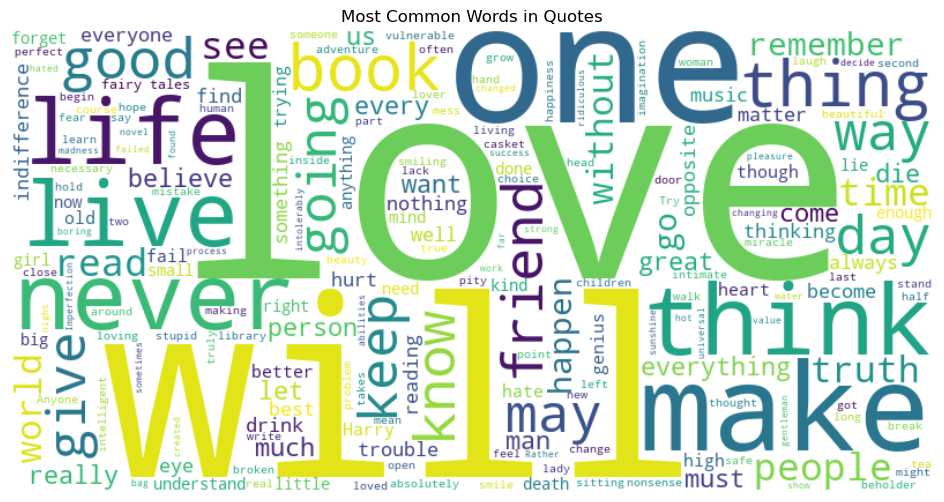

In [93]:
# Join all non-null quotes into a single text string
text = ' '.join(df['Quote'].dropna())

# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Quotes')
plt.show()

In [ ]:
# PIE CHART: Proportion of top 5 tags

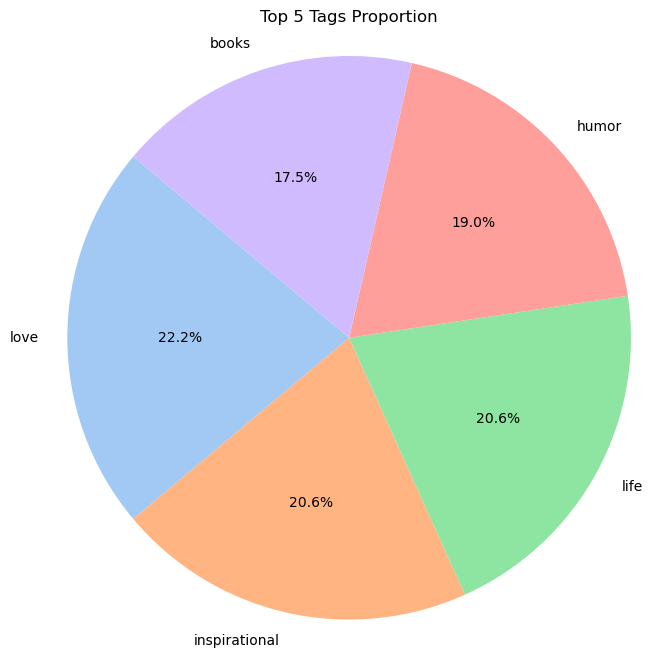

In [71]:
# Split comma-separated tags into lists
df['Tags'] = df['Tags'].fillna('').apply(lambda x: x.split(','))

# Remove extra spaces around tags
df['Tags'] = df['Tags'].apply(lambda tag_list: [tag.strip() for tag in tag_list if tag.strip() != ''])

# Flatten all tags
all_tags = df['Tags'].explode()

# Get top 5 tags
top_tags = all_tags.value_counts().head(5)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_tags.values, labels=top_tags.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('Top 5 Tags Proportion')
plt.axis('equal')
plt.show()

In [ ]:
#Histogram: Quote Length Distribution

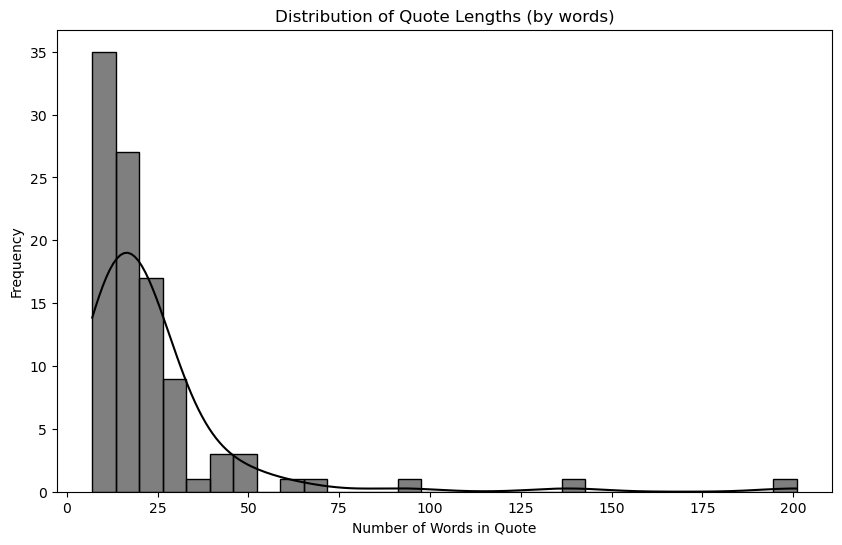

In [95]:
# Create a new column for quote length
df['Quote_Length'] = df['Quote'].apply(lambda x: len(x.split()))

# Plot histogram of quote lengths
plt.figure(figsize=(10,6))
sns.histplot(df['Quote_Length'], bins=30, kde=True, color='black')
plt.title('Distribution of Quote Lengths (by words)')
plt.xlabel('Number of Words in Quote')
plt.ylabel('Frequency')
plt.show()

In [91]:
#Box Plot: Quote Lengths per Top Author

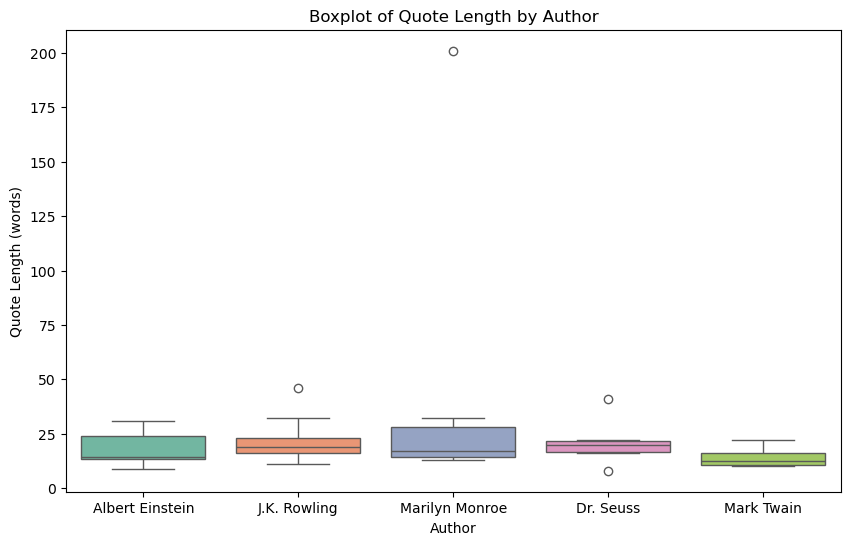

In [85]:
# Select top 5 authors
top_authors = df['Author'].value_counts().head(5).index
# Filter the original DataFrame to include only quotes from the top 5 authors
filtered_df = df[df['Author'].isin(top_authors)]

plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df, x='Author', y='Quote_Length', hue='Author', palette='Set2', legend=False)
plt.title('Boxplot of Quote Length by Author')
plt.xlabel('Author')
plt.ylabel('Quote Length (words)')
plt.show()

In [89]:
#Heatmap: Correlation Matrix

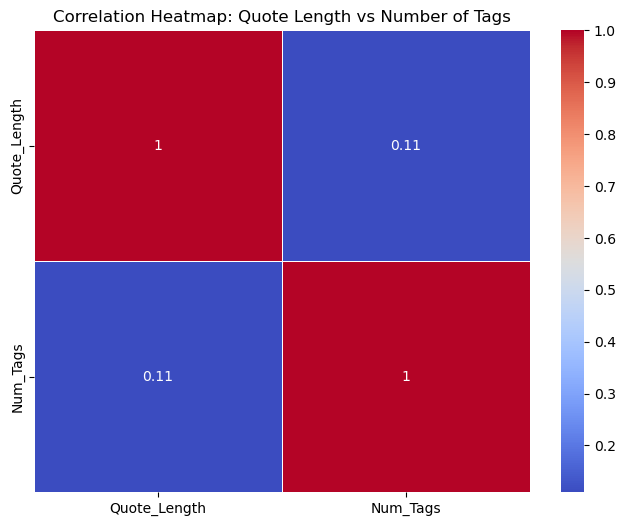

In [77]:
# Add number of tags per quote
df['Num_Tags'] = df['Tags'].apply(lambda tags: len(tags) if isinstance(tags, list) else 0)

# Correlation matrix heatmap between Quote Length and Number of Tags
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quote_Length', 'Num_Tags']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Quote Length vs Number of Tags')
plt.show()

In [ ]:
#Count Plot: Number of Quotes per Top Tag

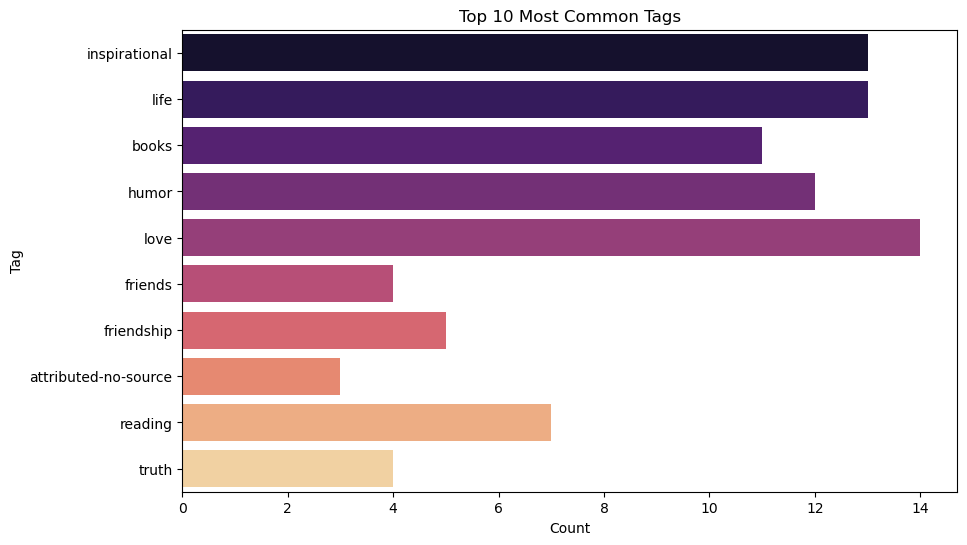

In [81]:
# Get top 10 tags
top_10_tags = all_tags.value_counts().head(10)
top_tags_filtered = all_tags[all_tags.isin(top_10_tags.index)]

# Countplot without FutureWarning
plt.figure(figsize=(10,6))
sns.countplot(y=top_tags_filtered, hue=top_tags_filtered, palette='magma', legend=False)
plt.title('Top 10 Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()